# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

dataset = fetch_openml('mnist_784')
X, y = dataset['data'], dataset['target']

### Now take a look at the shapes of the X and y matricies 

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [6]:
X.loc[36000].value_counts()

0.0      634
253.0     66
4.0        4
249.0      3
239.0      2
        ... 
21.0       1
12.0       1
53.0       1
35.0       1
13.0       1
Name: 36000, Length: 68, dtype: int64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

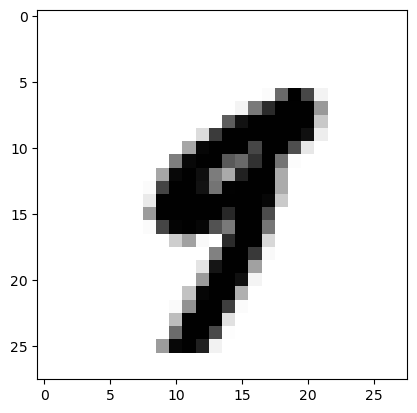

In [7]:
import matplotlib
import matplotlib.pyplot as plt 

plt.imshow(np.asarray(X.loc[36000]).reshape(28, 28), cmap = matplotlib.cm.binary, interpolation="nearest" ) 

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [9]:
y.loc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
x_train, x_test = X[:60000],X[60000:]
y_train, y_test = y[:60000],y[60000:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [10]:
y_train_5 = np.where(y_train == '5', 1,0) 
y_test_5 = np.where(y_test == '5', 1,0) 
y_test_5

array([0, 0, 0, ..., 0, 1, 0])

In [11]:

y_train[0]

'5'

In [12]:

y_train_5[0]

1

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train_5)

c:\Users\borys\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [15]:
predictions = lr.predict(x_train) 
predictions[36000]

# Yes, the result shown that it's not a five

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        #a new array of given shape and type, filled with zeros.
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [17]:
never_5_clf.fit(x_train, y_train_5)
never5_pred = never_5_clf.predict(x_test)

In [18]:
import collections, numpy
unique, counts = numpy.unique(never5_pred, return_counts=True)
dict(zip(unique, counts))
# so there is no 5 in the test group, since the never5classifier put all predictions into 0 

{False: 10000}

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

print("Logistic regression")
print(confusion_matrix(y_train_5, predictions))
print(precision_score(y_train_5, predictions))
print(recall_score(y_train_5, predictions))
print(f1_score(y_train_5, predictions))

# Comparison for never 5
print("\nNever 5")
print(confusion_matrix(y_test_5, never5_pred))
print(precision_score(y_test_5, never5_pred))
print(recall_score(y_test_5, never5_pred))
print(f1_score(y_test_5, never5_pred))

Logistic regression
[[54153   426]
 [  905  4516]]
0.9138000809388911
0.8330566316177827
0.871562288912477

Never 5
[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


c:\Users\borys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# in the 2nd confusion matrix, there is no FP&TP, so it predicts only one class
# so the 1st model works better

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

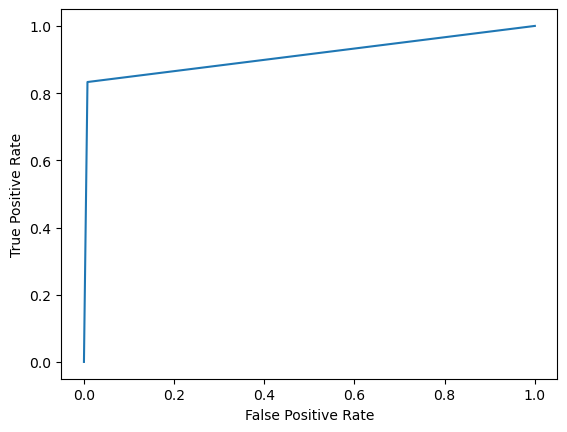

In [20]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns 

fpr, tpr, thresholds = roc_curve(y_train_5, predictions)

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

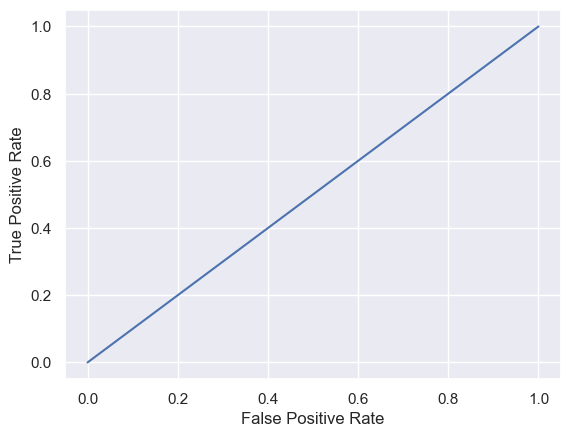

In [21]:
fpr, tpr, thresholds = roc_curve(y_test_5, never5_pred)

sns.set_theme(style="darkgrid")

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Now find the roc_auc_score for each. 

In [22]:
from sklearn.metrics import roc_auc_score

print('Roc_auc score - Logistic regression:', roc_auc_score(y_train_5, predictions))
print('\nRoc_auc score - Never 5 Clasifier:', roc_auc_score(y_test_5, never5_pred))

Roc_auc score - Logistic regression: 0.9126257159078305

Roc_auc score - Never 5 Clasifier: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [23]:
# logisitic regression, the Roc_auc_ score is closer to 1